In [86]:
import pandas as pd
import numpy as np
import itertools as it

In [145]:
# Parameters
base_recomendations = "../data/baseline_recommendations_for_500_users.json"
single_partition_recommendations = "../data/recommendations_for_500_users_single_partition.json"
recommendations = "../data/recommendations_experiment.json"
users = "../data/users.json"
output = "../output/test.png"
output_partitions = "../output/test_2.png"
cut_off = 10
list_k = range(1, cut_off + 1)
partitions = ["0", "1"]

In [146]:
# Compute cross product of all configuration values
configurations = list(it.product(list_k, partitions))
configurations

[(1, '0'),
 (1, '1'),
 (2, '0'),
 (2, '1'),
 (3, '0'),
 (3, '1'),
 (4, '0'),
 (4, '1'),
 (5, '0'),
 (5, '1'),
 (6, '0'),
 (6, '1'),
 (7, '0'),
 (7, '1'),
 (8, '0'),
 (8, '1'),
 (9, '0'),
 (9, '1'),
 (10, '0'),
 (10, '1')]

In [168]:
# Read data
recommendations_base = pd.read_json(base_recomendations, orient="table")
recommendations_df = pd.read_json(recommendations, orient="table")
sigle_partition_recommendations = pd.read_json(single_partition_recommendations, orient="table")
sigle_partition_recommendations["partition"] = "single"
user_ids = pd.read_json(users, orient="table")["user"].values

In [90]:
def apk(list_actual: list, list_predicted: list, k=10):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    list_actual : list
             A list of elements that are to be predicted (order doesn't matter)
    list_predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """
    if len(list_predicted) > k:
        list_predicted = list_predicted[:min(len(list_actual), k)]

    sum_precision = 0.0
    num_hits = 0.0
    
    for i, prediction in enumerate(list_predicted):
        if prediction in list_actual and prediction not in list_predicted[:i]:
            num_hits += 1.0
            precision_at_i = num_hits / (i + 1.0)
            sum_precision += precision_at_i

    if not list_actual:
        return 0.0

    return sum_precision / min(len(list_actual), k)


def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.
    This function computes the mean average prescision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [132]:
# actual = recommendations_base[recommendations_base["user"]==1018562002678108162]["recommendations"].values[0]
# display(actual)
predicted = recommendations_df[(recommendations_df["user"]==1018562002678108162)]["recommendations"].values
# display(predicted)
# a = apk(actual, predicted, 10)
# a
merged_df = recommendations_df.groupby("user", as_index=False).agg({'recommendations': 'sum'})
merged_df["partition"] = "merged"
display(merged_df)

,user,recommendations,partition
0,8862032,"[1132790016881696770, 1130538488254935040, 113...",merged
1,12538522,[],merged
2,13218102,"[1132655433762713600, 1122497071326617600, 113...",merged
3,14102621,[],merged
4,14147648,"[1133777266499047424, 1133429194103377920, 113...",merged
...,...,...,...
495,1126006032973615104,"[1132870144957353984, 1129540190484275200, 108...",merged
496,1129507866413375488,"[1128640848038637568, 1134319846445998080, 113...",merged
497,1130689064183717888,[],merged
498,1132082053921628160,"[1134199323263209480, 1134303821121769474, 113...",merged


In [164]:
from collections import defaultdict
list_actuals = []
list_predictions = []
list_mapk = []
for k, partition in configurations:
    for i, uid in enumerate(user_ids):
        actual = recommendations_base[recommendations_base["user"]==uid]["recommendations"].values[0]
        predicted = recommendations_df[(recommendations_df["user"]==uid) & (recommendations_df["partition"]==partition)]["recommendations"].values[0]
#         print(predicted)
#         a = apk(actual, predicted, int(k))
#         print(f"apk {a} for user {uid}")
        list_actuals.append(actual)
        list_predictions.append(predicted)
    m = mapk(list_actuals, list_predictions, int(k))
    list_mapk.append((f"partition {partition}", m))
    print(f"map@{k}: {m}    paritition: {partition}")
    
dict_mapk = defaultdict(list)
for k, v in list_mapk:
    dict_mapk[k].append(v)
dict_mapk

map@1: 0.324    paritition: 0
map@1: 0.198    paritition: 1
map@2: 0.2135    paritition: 0
map@2: 0.1745    paritition: 1
map@3: 0.17784444444444444    paritition: 0
map@3: 0.15577777777777777    paritition: 1
map@4: 0.1541190476190476    paritition: 0
map@4: 0.13952083333333332    paritition: 1
map@5: 0.13498444444444446    paritition: 0
map@5: 0.12457666666666667    paritition: 1
map@6: 0.11898080808080808    paritition: 0
map@6: 0.11131388888888889    paritition: 1
map@7: 0.10577001569858711    paritition: 0
map@7: 0.09988129251700681    paritition: 1
map@8: 0.09490757936507938    paritition: 0
map@8: 0.09028675595238095    paritition: 1
map@9: 0.08582532939101566    paritition: 0
map@9: 0.08211909171075837    paritition: 1
map@10: 0.0779853634085213    paritition: 0
map@10: 0.07494718253968254    paritition: 1


defaultdict(list,
            {'partition 0': [0.324,
              0.2135,
              0.17784444444444444,
              0.1541190476190476,
              0.13498444444444446,
              0.11898080808080808,
              0.10577001569858711,
              0.09490757936507938,
              0.08582532939101566,
              0.0779853634085213],
             'partition 1': [0.198,
              0.1745,
              0.15577777777777777,
              0.13952083333333332,
              0.12457666666666667,
              0.11131388888888889,
              0.09988129251700681,
              0.09028675595238095,
              0.08211909171075837,
              0.07494718253968254]})

In [165]:
def get_mapk_single_partition(single_partition_df):
    list_actuals = []
    list_predictions = []
    list_mapk = []
    partition = single_partition_df.partition.values[0]
    for k in list_k:
        for i, uid in enumerate(user_ids):
            actual = recommendations_base[recommendations_base["user"]==uid]["recommendations"].values[0]
            predicted = single_partition_df[(single_partition_df["user"]==uid)]["recommendations"].values[0]
            list_actuals.append(actual)
            list_predictions.append(predicted)
        m = mapk(list_actuals, list_predictions, int(k))
        list_mapk.append((f"{partition}", m))
        print(f"map@{k}: {m}    paritition: {partition}")
    return list_mapk

In [166]:
single = get_mapk_single_partition(sigle_partition_recommendations)
merge = get_mapk_single_partition(merged_df)

single_partition_list = single + merge
    
for k, v in single_partition_list:
    dict_mapk[k].append(v)
dict_mapk

map@1: 0.96    paritition: single
map@2: 0.939    paritition: single
map@3: 0.9206666666666666    paritition: single
map@4: 0.899875    paritition: single
map@5: 0.8783    paritition: single
map@6: 0.854638888888889    paritition: single
map@7: 0.8248741496598639    paritition: single
map@8: 0.794421130952381    paritition: single
map@9: 0.7617323633156967    paritition: single
map@10: 0.725099126984127    paritition: single
map@1: 0.396    paritition: merged
map@2: 0.349    paritition: merged
map@3: 0.31155555555555553    paritition: merged
map@4: 0.27904166666666663    paritition: merged
map@5: 0.24915333333333337    paritition: merged
map@6: 0.22262777777777779    paritition: merged
map@7: 0.19976258503401362    paritition: merged
map@8: 0.18057351190476192    paritition: merged
map@9: 0.16423818342151675    paritition: merged
map@10: 0.14989436507936507    paritition: merged


defaultdict(list,
            {'partition 0': [0.324,
              0.2135,
              0.17784444444444444,
              0.1541190476190476,
              0.13498444444444446,
              0.11898080808080808,
              0.10577001569858711,
              0.09490757936507938,
              0.08582532939101566,
              0.0779853634085213],
             'partition 1': [0.198,
              0.1745,
              0.15577777777777777,
              0.13952083333333332,
              0.12457666666666667,
              0.11131388888888889,
              0.09988129251700681,
              0.09028675595238095,
              0.08211909171075837,
              0.07494718253968254],
             'single': [0.96,
              0.939,
              0.9206666666666666,
              0.899875,
              0.8783,
              0.854638888888889,
              0.8248741496598639,
              0.794421130952381,
              0.7617323633156967,
              0.725099126984127],
       

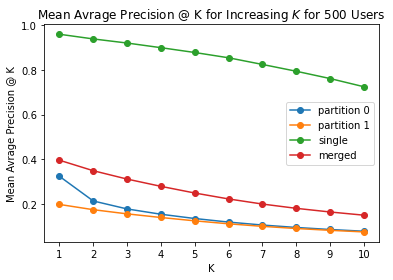

In [197]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlabel("K")
ax.set_ylabel("Mean Avrage Precision @ K")
ax.set_title(f"Mean Avrage Precision @ K for Increasing $K$ for {len(user_ids)} Users")

for k, v in dict_mapk.items():
    plt.plot(range(1, len(v) + 1), v, '-o', label=f"{k}")
    # NOTE: changed `range(1, 4)` to mach actual values count
plt.xticks(list_k)
plt.legend()  # To draw legend
plt.show()
fig.savefig(output_partitions, bbox_inches='tight')

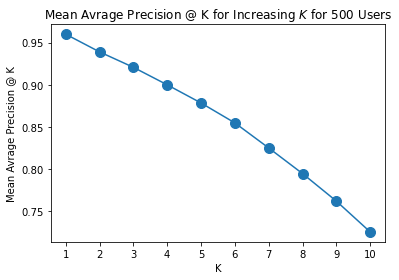

In [196]:
values = []
for value in single:
    values.append(value[1])
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(list_k, values , markersize=10, marker="o")
ax.set_xlabel("K")
plt.xticks(list_k)
ax.set_ylabel("Mean Avrage Precision @ K")
# plt.yticks(list_mapk)
ax.set_title(f"Mean Avrage Precision @ K for Increasing $K$ for {len(user_ids)} Users")

fig.savefig(output, bbox_inches='tight')